In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Reading the 'day.csv' file and storing it in a DataFrame named 'df'
df = pd.read_csv('day.csv')

# Displaying the contents of the DataFrame
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
# Dropping the 'instant' column from the DataFrame 'df'
df.drop(columns='instant', axis=0, inplace=True)

# Displaying the DataFrame after dropping the column
df


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [5]:
# Converting the 'dteday' column to datetime format, interpreting the day first
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)

# Displaying the DataFrame after converting the 'dteday' column to datetime
df


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,2019-12-28,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,2019-12-29,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,2019-12-30,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [6]:
df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2018-01-06,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2018-01-07,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2018-01-08,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2018-01-09,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2018-01-10,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [7]:
df.dteday.min()

Timestamp('2018-01-01 00:00:00')

In [8]:
# Timestamp('2023-09-18 00:00:00',, tz=None)
# Deriving "days since the show started"
from datetime import date

d0 = pd.Timestamp('2018-01-01 00:00:00', tz=None)
#d0 = date(2017, 2, 28)
d1 = df.dteday

print(type(d0))
print(type(d1[0]))

delta = d1 - d0
df['day']= delta

df["day"] = df["day"].astype(str)
df["day"] = df["day"].str[:-5]
df["day"] = pd.to_numeric(df["day"], errors="coerce")
df.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [9]:
#mirroring the dataframe to new dataframe
df_new=df
df_new

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,725
726,2019-12-28,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,726
727,2019-12-29,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,727
728,2019-12-30,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,728


In [10]:
# Mapping season numbers to their corresponding names
df_new['season'] = df_new['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
# Mapping weather situation numbers to their corresponding labels
df_new['weathersit'] = df_new['weathersit'].map({
    1: 'Clear', 
    2: 'Mist', 
    3: 'Light Rain/Snow', 
    4: 'Heavy Rain/Snow'
})
df_new

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,2018-01-01,Spring,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2018-01-02,Spring,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,2018-01-03,Spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,2018-01-04,Spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,2018-01-05,Spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,Spring,1,12,0,5,1,Mist,10.420847,11.33210,65.2917,23.458911,247,1867,2114,725
726,2019-12-28,Spring,1,12,0,6,0,Mist,10.386653,12.75230,59.0000,10.416557,644,2451,3095,726
727,2019-12-29,Spring,1,12,0,0,0,Mist,10.386653,12.12000,75.2917,8.333661,159,1182,1341,727
728,2019-12-30,Spring,1,12,0,1,1,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796,728


### EDA

In [12]:
cat_cols=[]
num_cols=[]
for i in df_new.columns:
    if df_new[i].nunique()>30:
        num_cols.append(i)
        
    else:
        cat_cols.append(i)

print(cat_cols)
print(num_cols)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'day']


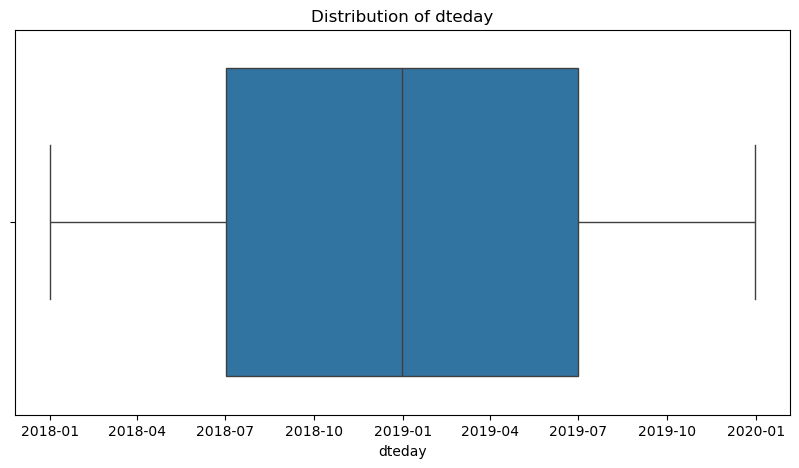

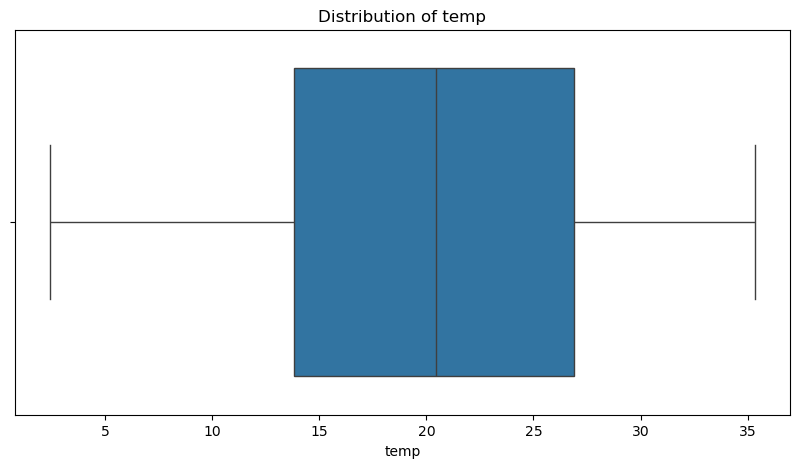

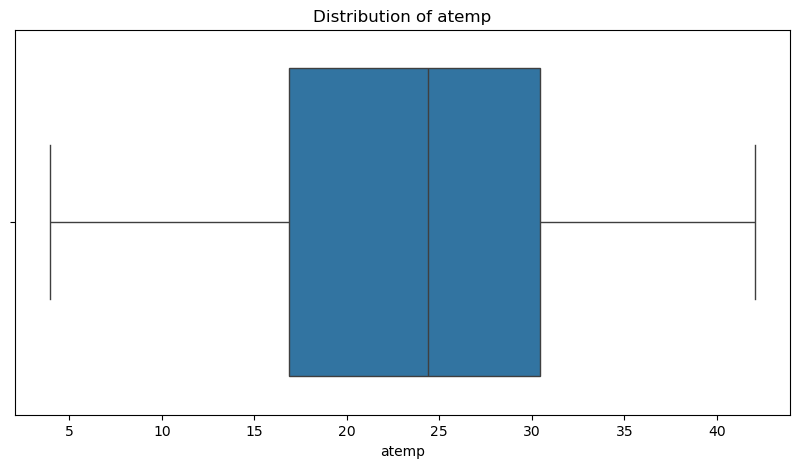

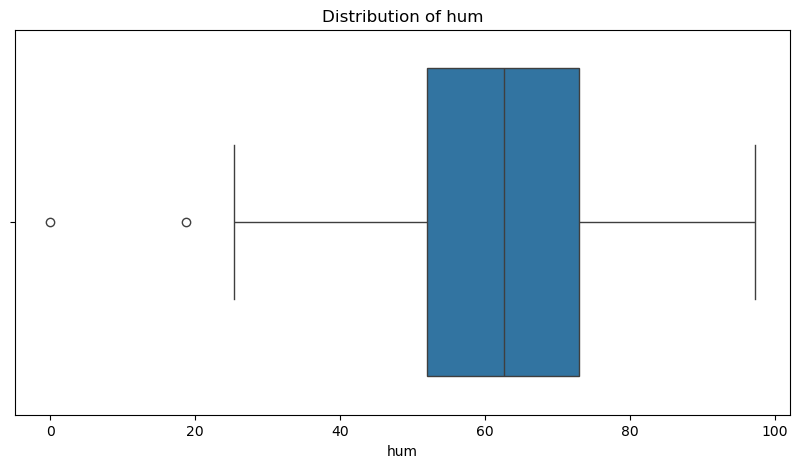

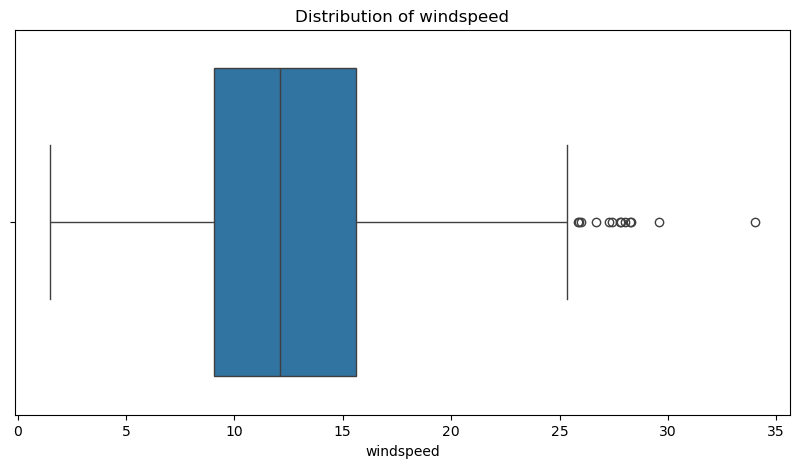

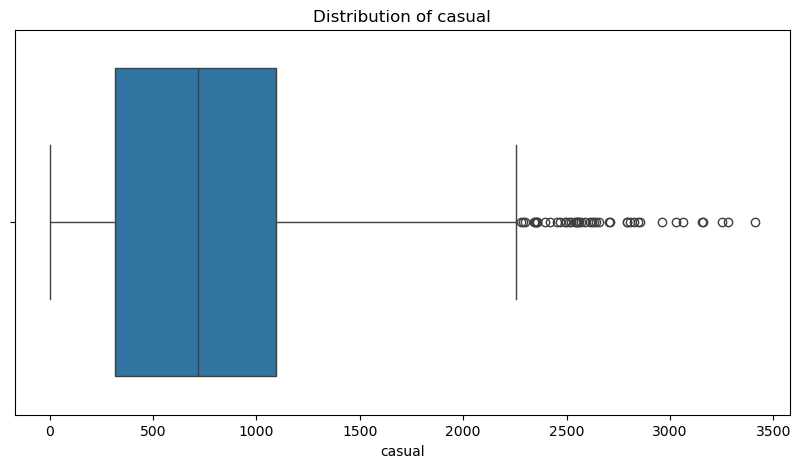

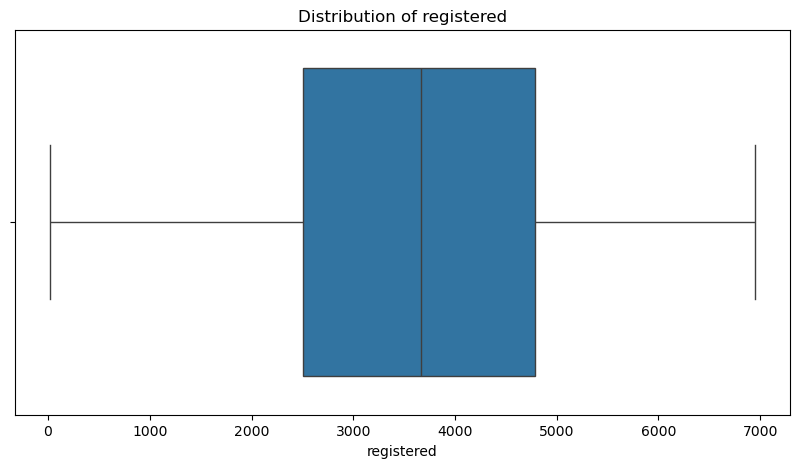

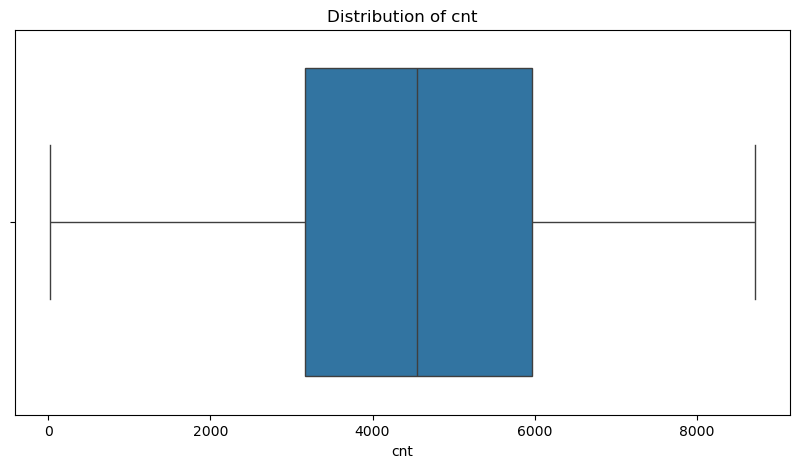

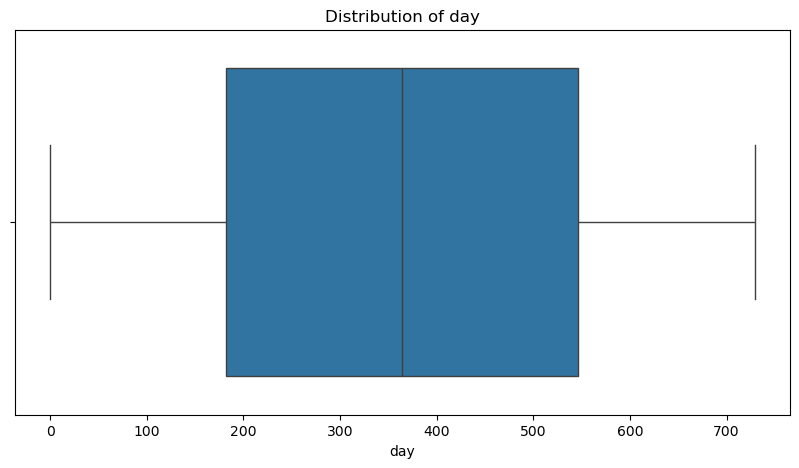

In [13]:
#Displaying boxplot for num_cols
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_new[col])
    plt.title(f'Distribution of {col}')
    plt.show()
    # plt.savefig(f'Distribution of {col}')

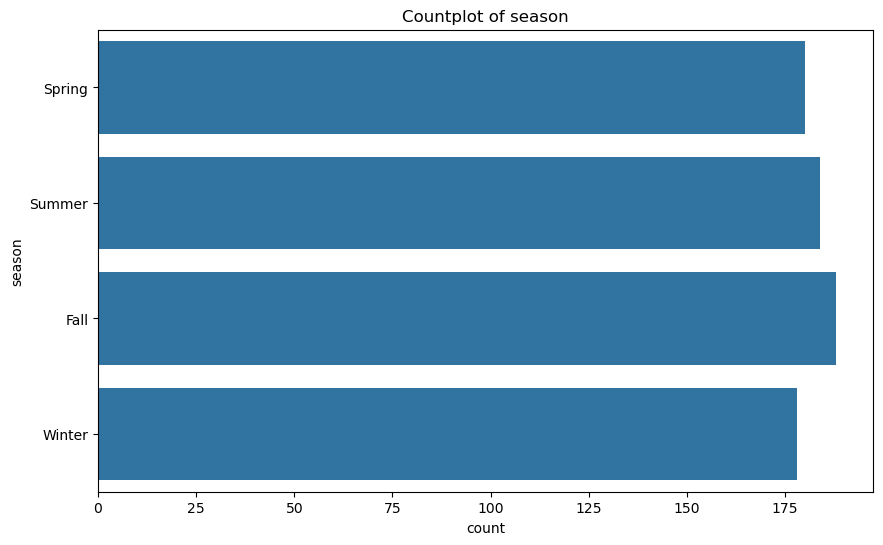

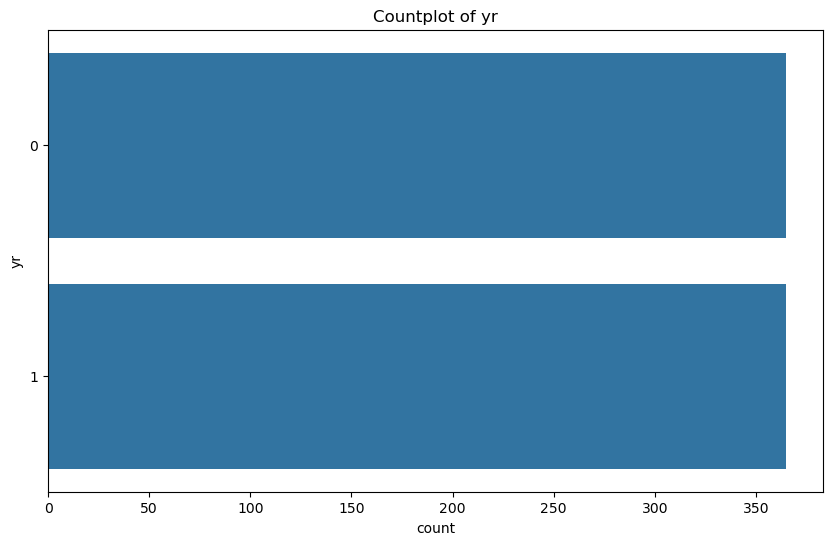

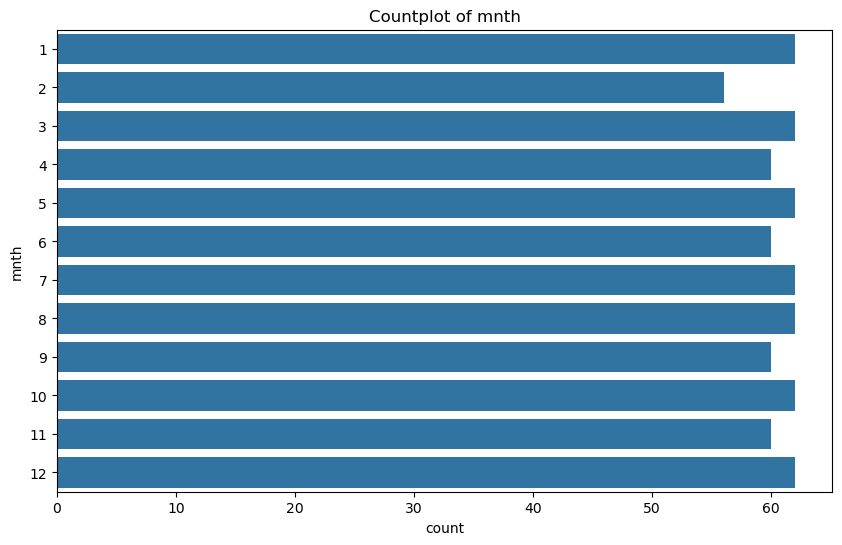

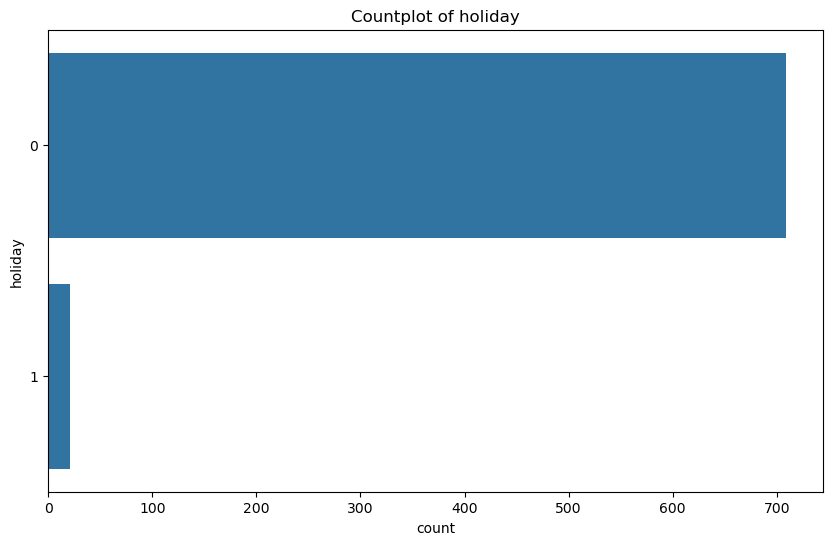

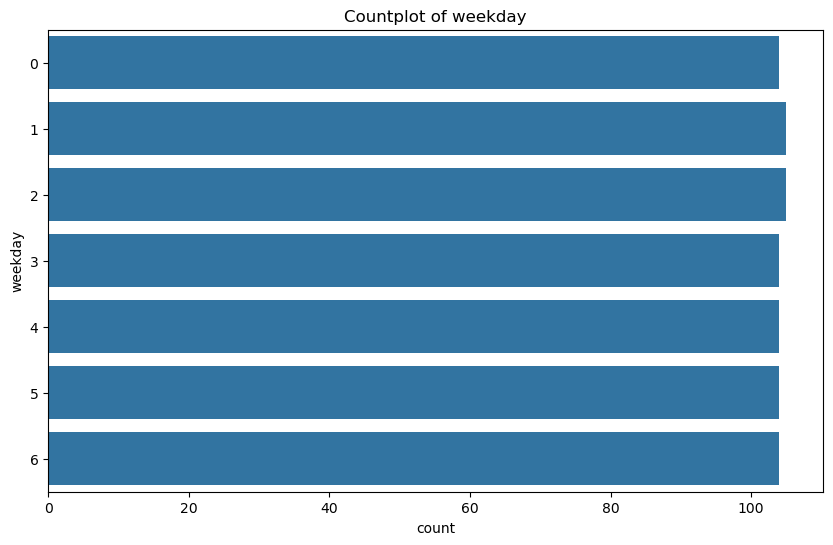

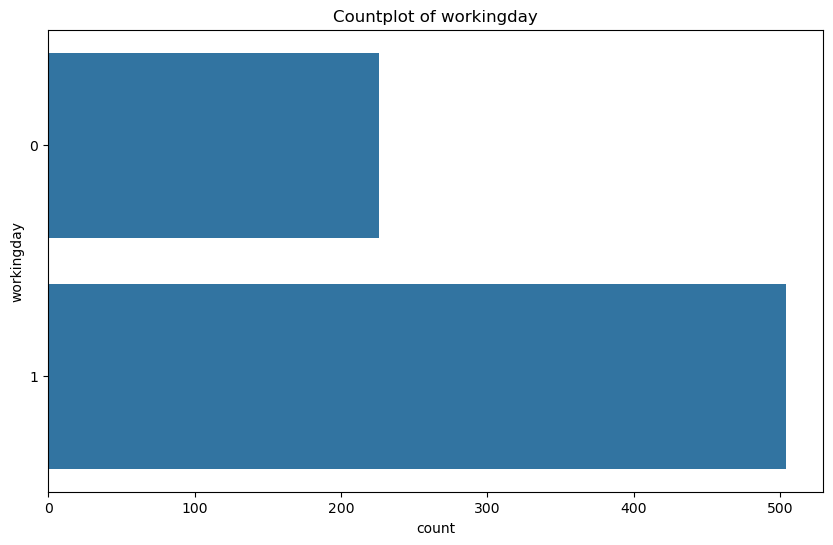

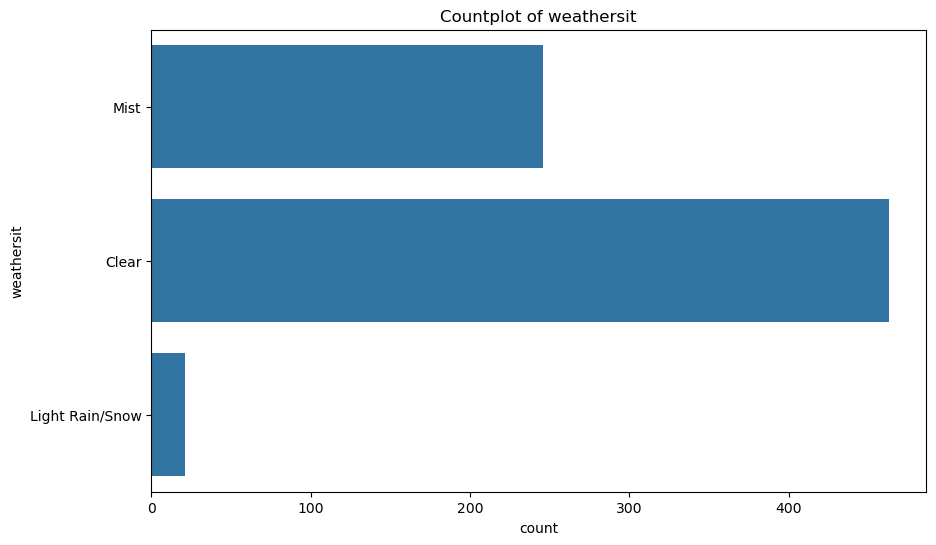

In [14]:
#Displaying countplot for cat_cols
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_new[col])
    plt.title(f'Countplot of {col}')
    plt.show()

In [15]:
df_new.weathersit.value_counts()

weathersit
Clear              463
Mist               246
Light Rain/Snow     21
Name: count, dtype: int64

In [16]:
# Create dummy variables (one-hot encoding) for 'season' and 'weathersit' and convert them to 1s and 0s
dummies1 = pd.get_dummies(df_new['season'], drop_first=True).astype(int)
dummies2 = pd.get_dummies(df_new['weathersit'], drop_first=True).astype(int)

print(dummies1)
print(dummies2)
df_new=pd.concat([df_new,dummies1],axis=1)
df_new=pd.concat([df_new,dummies2],axis=1)

df_new.drop(columns=['season','weathersit'],inplace=True)
# # Display the updated dataframe
df_new.head()




     Spring  Summer  Winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]
     Light Rain/Snow  Mist
0                  0     1
1                  0     1
2                  0     0
3                  0     0
4                  0     0
..               ...   ...
725                0     1
726                0     1
727                0     1
728                0     0
729                0     1

[730 rows x 2 columns]


,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,Spring,Summer,Winter,Light Rain/Snow,Mist
0,2018-01-01,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0,0,1
1,2018-01-02,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,1,0,0,0,1
2,2018-01-03,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2,1,0,0,0,0
3,2018-01-04,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3,1,0,0,0,0
4,2018-01-05,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4,1,0,0,0,0


In [17]:
#dropping the atemp column
df_new.drop(columns=['atemp'],inplace=True)

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dteday           730 non-null    datetime64[ns]
 1   yr               730 non-null    int64         
 2   mnth             730 non-null    int64         
 3   holiday          730 non-null    int64         
 4   weekday          730 non-null    int64         
 5   workingday       730 non-null    int64         
 6   temp             730 non-null    float64       
 7   hum              730 non-null    float64       
 8   windspeed        730 non-null    float64       
 9   casual           730 non-null    int64         
 10  registered       730 non-null    int64         
 11  cnt              730 non-null    int64         
 12  day              730 non-null    int64         
 13  Spring           730 non-null    int32         
 14  Summer           730 non-null    int32    

In [19]:
# Writing df_new to a CSV file
df_new.to_csv('days_updated.csv', index=False)

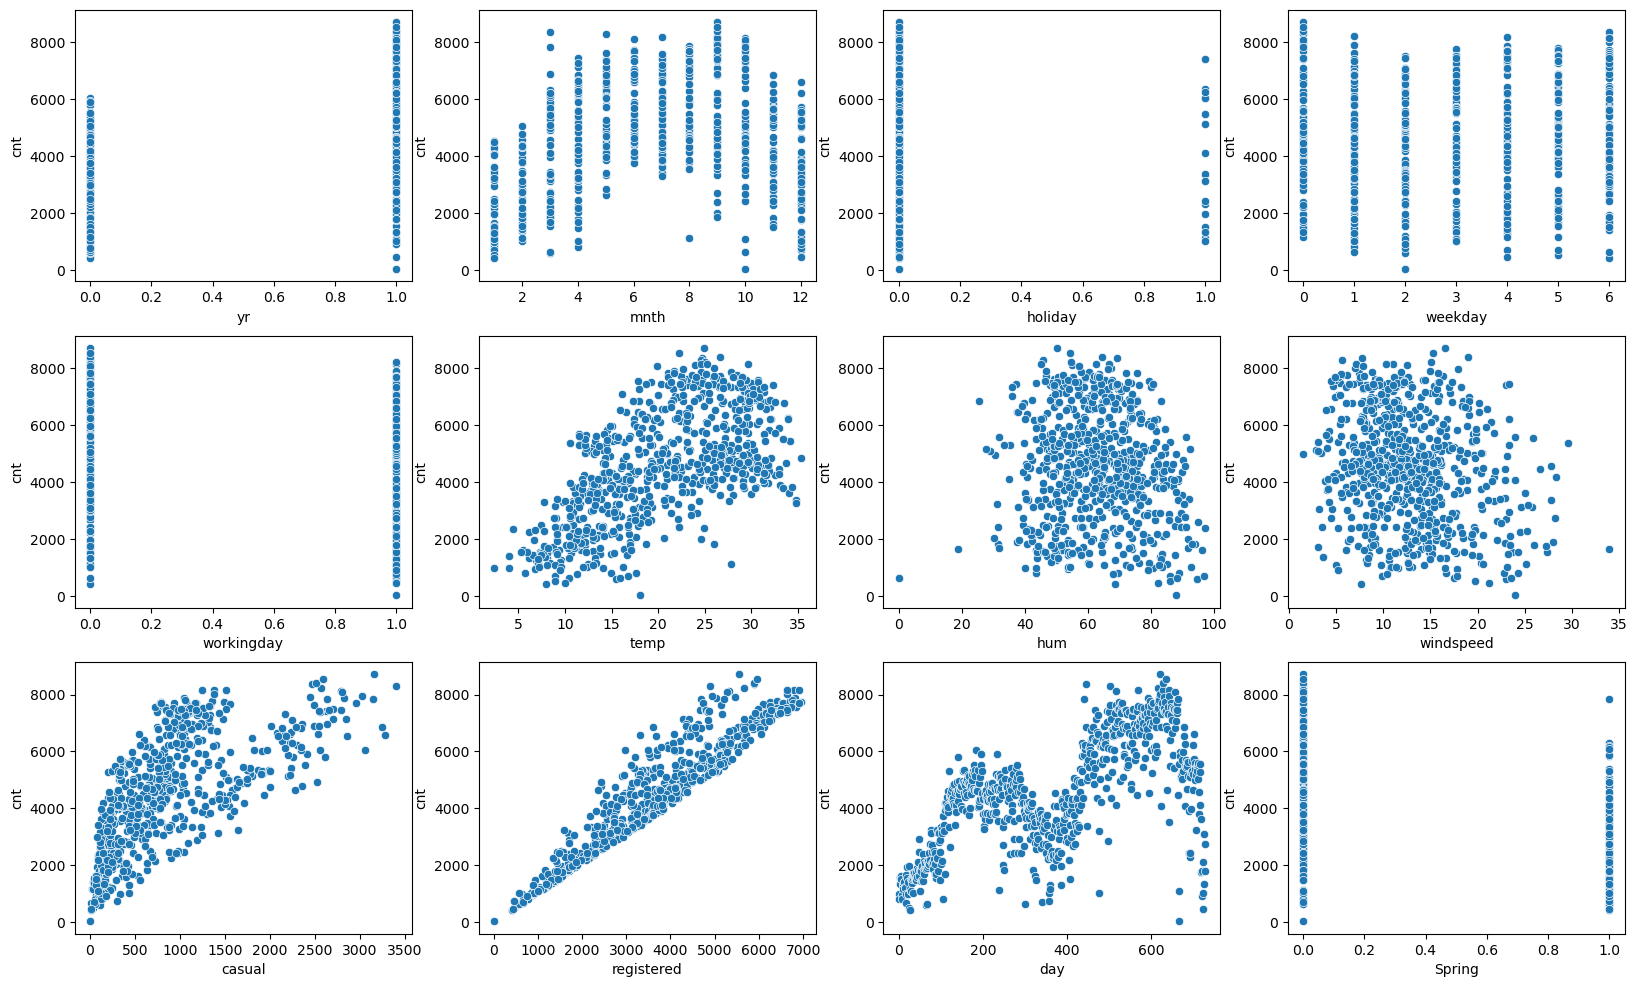

In [20]:
plt.figure(figsize=(20, 12))

# Scatter plot for 'yr' vs 'cnt'
plt.subplot(3, 4, 1)
sns.scatterplot(x='yr', y='cnt', data=df_new)

# Scatter plot for 'mnth' vs 'cnt'
plt.subplot(3, 4, 2)
sns.scatterplot(x='mnth', y='cnt', data=df_new)

# Scatter plot for 'holiday' vs 'cnt'
plt.subplot(3, 4, 3)
sns.scatterplot(x='holiday', y='cnt', data=df_new)

# Scatter plot for 'weekday' vs 'cnt'
plt.subplot(3, 4, 4)
sns.scatterplot(x='weekday', y='cnt', data=df_new)

# Scatter plot for 'workingday' vs 'cnt'
plt.subplot(3, 4, 5)
sns.scatterplot(x='workingday', y='cnt', data=df_new)

# Scatter plot for 'temp' vs 'cnt'
plt.subplot(3, 4, 6)
sns.scatterplot(x='temp', y='cnt', data=df_new)

# Scatter plot for 'temp' vs 'cnt'
plt.subplot(3, 4, 7)
sns.scatterplot(x='hum', y='cnt', data=df_new)

# Scatter plot for 'temp' vs 'cnt'
plt.subplot(3, 4, 8)
sns.scatterplot(x='windspeed', y='cnt', data=df_new)

# Scatter plot for 'temp' vs 'cnt'
plt.subplot(3, 4, 9)
sns.scatterplot(x='casual', y='cnt', data=df_new)

plt.subplot(3, 4, 10)
sns.scatterplot(x='registered', y='cnt', data=df_new)

plt.subplot(3, 4, 11)
sns.scatterplot(x='day', y='cnt', data=df_new)

plt.subplot(3, 4, 12)
sns.scatterplot(x='Spring', y='cnt', data=df_new)
plt.show()


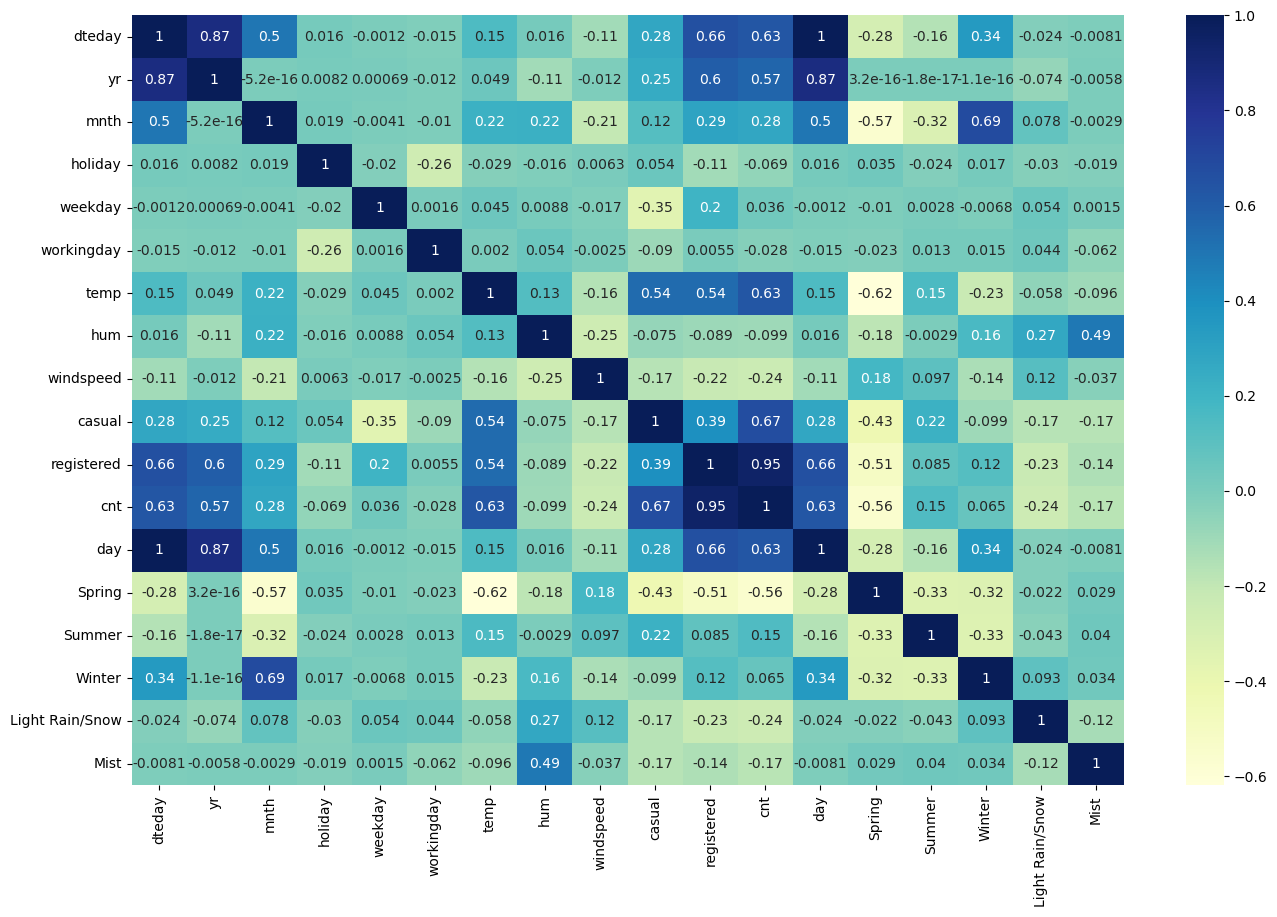

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_new.corr(), annot = True, cmap="YlGnBu")
plt.show()